In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("Credit_card.csv")
df_lab = pd.read_csv("Credit_card_label.csv")
df_merge = pd.merge(df, df_lab, on="Ind_ID", how="outer")
df_merge = df_merge.drop(columns = ["Ind_ID", "Mobile_phone"], axis = 1)
df_merge

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0
3,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,0,0,0,Drivers,2,0
4,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,0,0,1,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,M,N,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,-12784.0,-1537,0,0,0,Drivers,1,0
1544,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958.0,-655,0,0,0,Sales staff,2,0
1545,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,-23643.0,365243,0,1,0,NaN,1,0
1546,M,Y,Y,0,116100.0,Working,Secondary / secondary special,Married,House / apartment,-10136.0,-2441,0,0,0,Laborers,2,0


In [55]:
gender_map = {"M": 1, "F": 2}
df_merge["GENDER"] = df["GENDER"].map(gender_map)
car_map = {"Y": 1, "N": 2}
df_merge["Car_Owner"] = df["Car_Owner"].map(car_map)
prop_map = {"Y": 1, "N": 2}
df_merge["Propert_Owner"] = df["Propert_Owner"].map(prop_map)
mar_map = {"Married": 1, "Single / not married": 2, "Civil marriage": 3, "Separated": 4, "Widow": 5}
df_merge["Marital_status"] = df["Marital_status"].map(mar_map)
typ_map = {"Working": 1, "Commercial associate": 2, "Pensioner": 3, "State servant": 4}
df_merge["Type_Income"] = df["Type_Income"].map(typ_map)
ed_map = {"Secondary / secondary special": 1, "Higher education": 2, "Incomplete higher": 3, "Lower secondary": 4, "Academic degree": 5}
df_merge["EDUCATION"] = df["EDUCATION"].map(ed_map)
hous_map = {"House / apartment": 1, "With parents": 2, "Municipal apartment": 3, "Rented apartment": 4, "Office apartment": 5, "Co-op apartment": 6}
df_merge["Housing_type"] = df["Housing_type"].map(hous_map)
occ_map = {"Laborers": 1, "Core staff": 2, "Managers": 3, "Sales staff": 4, "Drivers": 5, "High skill tech staff": 6, "Medicine staff": 7, "Accountants": 8,
"Security staff": 9, "Cleaning staff": 10, "Cooking staff": 11, "Private service staff": 12, "Secretaries": 13, "Low-skill Laborers": 14, "Waiters/barmen staff": 15, "HR staff": 16, "IT staff": 17, "Reality agents": 18}
df_merge["Type_Occupation"] = df["Type_Occupation"].map(occ_map)
df_merge["Annual_income"].fillna(0, inplace=True)
df_merge["Type_Occupation"].fillna(0, inplace=True)
df_merge["Birthday_count"].fillna(0, inplace=True)
df_merge["GENDER"].fillna(0, inplace=True)
df_merge

/var/folders/z1/rjx7d_zx5yb0cfkp8qbb5d9w0000gn/T/ipykernel_20249/3696849780.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge["Annual_income"].fillna(0, inplace=True)
/var/folders/z1/rjx7d_zx5yb0cfkp8qbb5d9w0000gn/T/ipykernel_20249/3696849780.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1.0,1,1,0,180000.0,3,2,1,1,-18772.0,365243,0,0,0,0.0,2,1
1,2.0,1,2,2,135000.0,2,2,1,1,-15761.0,-3173,0,0,0,0.0,4,0
2,2.0,1,2,0,247500.0,2,2,1,1,-17016.0,-1347,0,0,0,0.0,1,0
3,2.0,1,2,0,157500.0,2,2,1,1,-9927.0,-828,0,0,0,0.0,2,0
4,2.0,1,2,2,216000.0,2,2,1,1,-15444.0,-3112,0,0,1,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2.0,2,1,0,180000.0,2,2,1,1,-12784.0,-1537,0,0,0,3.0,1,0
1544,2.0,2,2,0,283500.0,2,3,2,1,-17958.0,-655,0,0,0,8.0,2,0
1545,1.0,1,1,0,135000.0,1,2,1,1,-23643.0,365243,0,1,0,3.0,1,0
1546,1.0,1,2,0,116100.0,1,1,3,1,-10136.0,-2441,0,0,0,5.0,2,0


In [56]:
def cleaning(df):
     df_merge["Employed_days"] = df_merge["Employed_days"].apply(lambda x: 0 if x < 0 else 1)
# 1 = Employed
# 0 = Unemployed
     return df_merge

In [57]:
cleaning(df_merge)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1.0,1,1,0,180000.0,3,2,1,1,-18772.0,1,0,0,0,0.0,2,1
1,2.0,1,2,2,135000.0,2,2,1,1,-15761.0,0,0,0,0,0.0,4,0
2,2.0,1,2,0,247500.0,2,2,1,1,-17016.0,0,0,0,0,0.0,1,0
3,2.0,1,2,0,157500.0,2,2,1,1,-9927.0,0,0,0,0,0.0,2,0
4,2.0,1,2,2,216000.0,2,2,1,1,-15444.0,0,0,0,1,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2.0,2,1,0,180000.0,2,2,1,1,-12784.0,0,0,0,0,3.0,1,0
1544,2.0,2,2,0,283500.0,2,3,2,1,-17958.0,0,0,0,0,8.0,2,0
1545,1.0,1,1,0,135000.0,1,2,1,1,-23643.0,1,0,1,0,3.0,1,0
1546,1.0,1,2,0,116100.0,1,1,3,1,-10136.0,0,0,0,0,5.0,2,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_merge.drop("label", axis = 1)
y = df_merge["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

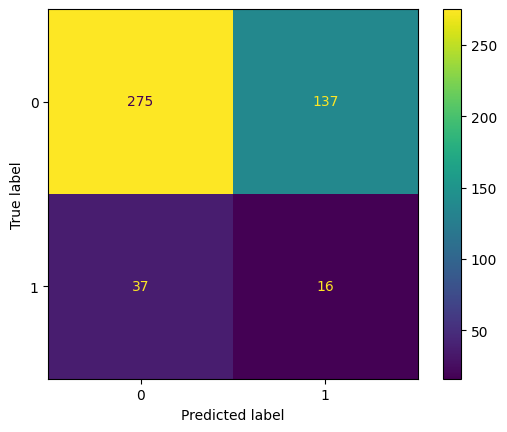

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

I used oversampling because we don't want to lose the minority data so we want to oversample

In [ ]:
77/(1+77)

0.9871794871794872

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

df_merge

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1.0,1,1,0,180000.0,3,2,1,1,-18772.0,1,0,0,0,0.0,2,1
1,2.0,1,2,2,135000.0,2,2,1,1,-15761.0,0,0,0,0,0.0,4,0
2,2.0,1,2,0,247500.0,2,2,1,1,-17016.0,0,0,0,0,0.0,1,0
3,2.0,1,2,0,157500.0,2,2,1,1,-9927.0,0,0,0,0,0.0,2,0
4,2.0,1,2,2,216000.0,2,2,1,1,-15444.0,0,0,0,1,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2.0,2,1,0,180000.0,2,2,1,1,-12784.0,0,0,0,0,3.0,1,0
1544,2.0,2,2,0,283500.0,2,3,2,1,-17958.0,0,0,0,0,8.0,2,0
1545,1.0,1,1,0,135000.0,1,2,1,1,-23643.0,1,0,1,0,3.0,1,0
1546,1.0,1,2,0,116100.0,1,1,3,1,-10136.0,0,0,0,0,5.0,2,0


In [ ]:
x = df_merge.drop("label", axis = 1)
Y = df_merge["label"]

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)

knn = KNeighborsRegressor(n_neighbors=13) 
knn.fit(x_train, Y_train) 
y_pred = knn.predict(x_test)
print(y_pred)
print(type(y_pred))

[0.         0.23076923 0.15384615 0.15384615 0.15384615 0.07692308
 0.         0.15384615 0.07692308 0.07692308 0.15384615 0.07692308
 0.         0.15384615 0.23076923 0.15384615 0.         0.
 0.         0.15384615 0.07692308 0.15384615 0.23076923 0.07692308
 0.         0.         0.         0.15384615 0.07692308 0.
 0.07692308 0.         0.07692308 0.23076923 0.15384615 0.
 0.30769231 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.15384615 0.23076923 0.15384615 0.07692308 0.07692308
 0.30769231 0.23076923 0.15384615 0.07692308 0.07692308 0.
 0.07692308 0.30769231 0.07692308 0.15384615 0.07692308 0.23076923
 0.07692308 0.07692308 0.         0.15384615 0.07692308 0.07692308
 0.15384615 0.         0.15384615 0.         0.23076923 0.07692308
 0.07692308 0.07692308 0.23076923 0.         0.07692308 0.15384615
 0.         0.38461538 0.07692308 0.23076923 0.07692308 0.15384615
 0.30769231 0.15384615 0.07692308 0.07692308 0.         0.
 0.         0.         0.07692308 0

In [ ]:
print(X_train.shape)

(1083, 16)


In [ ]:
print(y_train.shape)

(1083,)


In [ ]:
from sklearn.svm import SVC

model_SVC = SVC(kernel="linear", random_state = 4)
model_SVC.fit(X_train, y_train)


SVC(kernel='linear', random_state=4)

In [ ]:
model_perf = model_SVC.predict(X_test)
print(model_perf)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


With Logistic Regression to SVC the predict there are less 1's after doing SVC

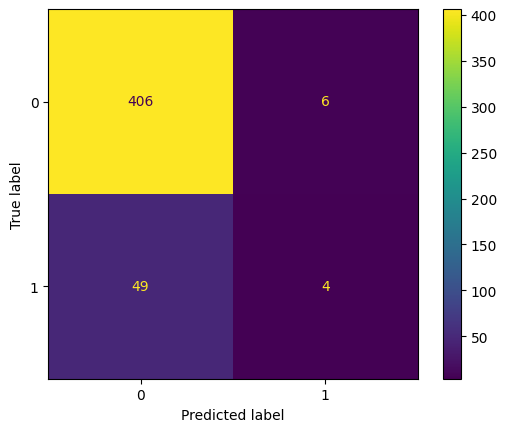

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_SVC, X_test, y_test)

In [ ]:
48/(30+48)

0.6153846153846154

It is shown that after SVC the recall score decreases from the previous SVC score

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred)
auc_logisitc = auc(logistic_fpr, logistic_tpr)

In [ ]:
logistic_fpr

array([0.        , 0.01699029, 0.05582524, 0.16504854, 0.41747573,
       0.77427184, 1.        ])

In [ ]:
logistic_tpr

array([0.        , 0.01886792, 0.03773585, 0.1509434 , 0.41509434,
       0.83018868, 1.        ])

In [ ]:
threshold

array([       inf, 0.38461538, 0.30769231, 0.23076923, 0.15384615,
       0.07692308, 0.        ])

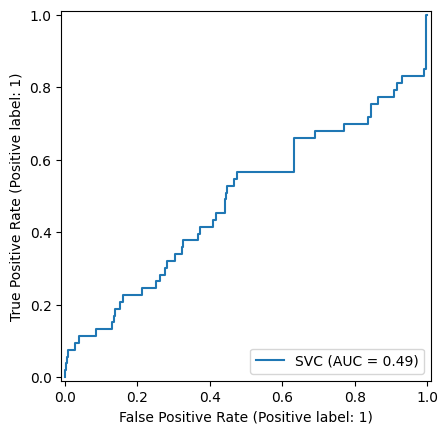

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_SVC, X_test, y_test)

plt.show()

In [ ]:
auc_val = auc(logistic_fpr, logistic_tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model.predict_proba(X)[:, 1])

np.float64(0.5468900218499636)

In [ ]:
roc_auc_score(y, model.decision_function(X))

np.float64(0.5468900218499636)

Outlier detection which is also called anomially detection is the process of identifying data points that possess an extreme value compared to the rest of the distrabution. It can be used for a variety of applications like detecting bank fraud or cybersecurity attacks. When desciding what method to choose you first have to look at the datas modality, shape, and size. From there you can decide on if you should use box plots, isolation forest, or oneclassSVM.